# 1.- Abrir el archivo de games y estudiar la informacion general


In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14597,Samurai Spirits: Tenkaichi Kenkakuden,PS2,NaN,Fighting,0.0,0.0,0.03,0.0,NaN,NaN,NaN


In [ ]:
# Cargar data 
df = pd.read_csv('/datasets/games.csv')
# Informacion general
df.info()
# Muestra de los datos
df.sample()

Tenemos un dataframe con 16715 filas y 11 columnas 
Las columnas tiene los nombre mezclados con mayusculas y minisculas 
Las columnas con valores faltantes son 'critic_score', 'name', 'year_of_release', 'genre', 'user_score' y 'rating


# 2.- Preparacion de datos

In [2]:
# Convertir los encabezados en minusculas
df = df.rename(str.lower, axis = 'columns')

In [3]:
# Observar el porcentaje de los valores ausentes
print(((df.isnull().sum() / len(df))*100).sort_values(ascending = False))

critic_score       51.319174
rating             40.478612
user_score         40.089740
year_of_release     1.609333
name                0.011965
genre               0.011965
platform            0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
dtype: float64


In [4]:
print(df[df['name'].isna()])
print(df[df['genre'].isna()])
# Se eliminan datos ausentes de genre y name.
df=df.dropna(subset=['genre']).reset_index(drop=True)   

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  
      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


In [5]:
# Verificamos datos ausentes de la columna 'year_of_release'
print(df[df['year_of_release'].isna()])
# Eliminamos  valores ausentes de year_of_release.
df=df.dropna(subset=['year_of_release']).reset_index(drop=True)

                                    name platform  year_of_release  \
183                      Madden NFL 2004      PS2              NaN   
377                     FIFA Soccer 2004      PS2              NaN   
456           LEGO Batman: The Videogame      Wii              NaN   
475           wwe Smackdown vs. Raw 2006      PS2              NaN   
609                       Space Invaders     2600              NaN   
...                                  ...      ...              ...   
16371  PDC World Championship Darts 2008      PSP              NaN   
16403                      Freaky Flyers       GC              NaN   
16446                          Inversion       PC              NaN   
16456        Hakuouki: Shinsengumi Kitan      PS3              NaN   
16520                       Virtua Quest       GC              NaN   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183          Sports      4.26      0.26      0.01         0.71          94.0   

In [6]:
# Verificamos los valores ausentes de la columna rating.
print(df[df['rating'].isna()])
# Verificamos valores unicos.
print(df['rating'].unique())
# Rellenamos los valores ausentes con la palabra unknown
df['rating'] = df['rating'].fillna(value='unknown')

                                name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES           1985.0      Platform   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                             Tetris       GB           1989.0        Puzzle   
9                          Duck Hunt      NES           1984.0       Shooter   
10                        Nintendogs       DS           2005.0    Simulation   
...                              ...      ...              ...           ...   
16439  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16440               LMA Manager 2007     X360           2006.0        Sports   
16441        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16442               Spirits & Spells      GBA           2003.0      Platform   
16443            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  ot

In [7]:
# Visualizamos los datos con 'tbd' en user_score.
print(df[df['user_score']=='tbd'])
# Sustituimos el tbd de user_score con el valor en critic_score
df.loc[df['user_score']=='tbd','user_score']=np.nan

                                 name platform  year_of_release       genre  \
119                     Zumba Fitness      Wii           2010.0      Sports   
300    Namco Museum: 50th Anniversary      PS2           2005.0        Misc   
516                   Zumba Fitness 2      Wii           2011.0      Sports   
639                      uDraw Studio      Wii           2010.0        Misc   
709                   Just Dance Kids      Wii           2010.0        Misc   
...                               ...      ...              ...         ...   
16424                 Planet Monsters      GBA           2001.0      Action   
16426                Bust-A-Move 3000       GC           2003.0      Puzzle   
16427                Mega Brain Boost       DS           2008.0      Puzzle   
16433                        Plushees       DS           2008.0  Simulation   
16435   Men in Black II: Alien Escape       GC           2003.0     Shooter   

       na_sales  eu_sales  jp_sales  other_sales  c

In [8]:
# Creamos la columna de total_sale
df['total_sale'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
 11  total_sale       16444 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.5+ MB


In [10]:
# Realizamos los cambios necesarios en el tipo de dato.
df['year_of_release']=df['year_of_release'].astype('int64')
df['user_score']=df['user_score'].astype('float64')

En las columnas genre, name y year_of_release, dado que sus porcentajes de valores ausentes son 0.011965, 0.011965, 1.609333 respectivamente no se considera significativos por lo que eliminer los registros 
En rating tiene 40.478612% de valores ausentes y como no tenemos manera de conocer esa informacion, rellene con la palabra unknown
En user_score tiene una abreviatura TBD: significa "to be determined", por lo que sustituir esa abreviatura por valor ausente
En critic_score y user_score tenemos una gran cantidad de valores ausentes pero dado que no tenemos manera de calcular esos scores considero que la mejor manera es dejarlo como estan, ya que es posible dañar el analisis
Cambie los tipos de datos de dos columnas (year_of_release = int y user_score = float)

# 3.- Analisis de datos

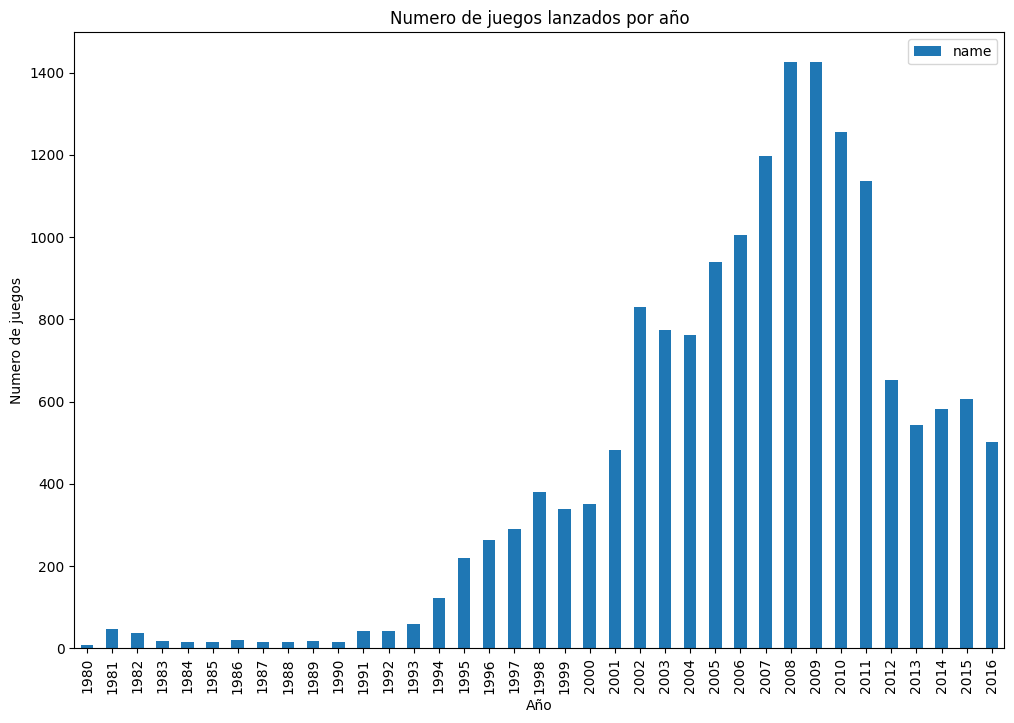

In [10]:
# Agrupamos los juegos por año.
game_years=df.pivot_table(index='year_of_release',values='name',aggfunc='count')
# Grafica de barras juegos lanzados por año
game_years.plot(title='Numero de juegos lanzados por año',kind='bar',xlabel='Año',ylabel='Numero de juegos',figsize=(12,8))
plt.show()

Observamos que a partir del año 1994 empiezan a incrementarse los lanzamientos de juegos, esto se alarga hasta el año 2009, en 2010 comienzan a descender.

A partir del año 2012 y hasta el 2016, observamos que los lanzamientos se mantienen muy similares, por lo que podriamos ignorar los datos posteriores a este año para el objetivo de este analísis, antes de tomar una decision, veremos las ventas por plataforma.

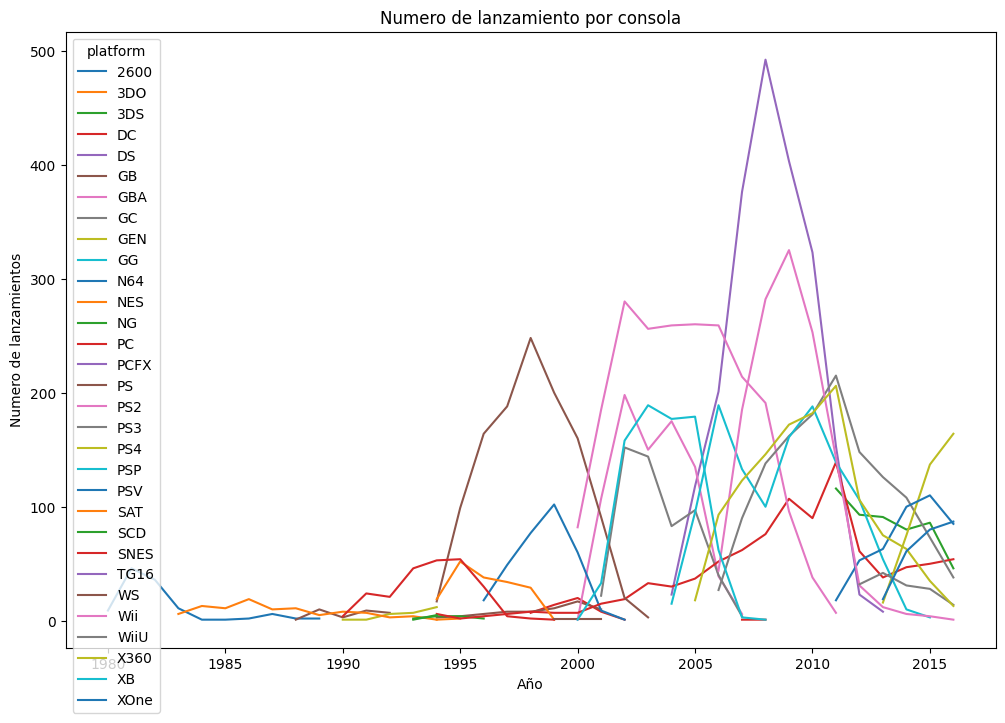

In [19]:
# Agrupamos por plataforma atraves de los años.
platform_release=df.pivot_table(index='year_of_release',columns='platform',values='name', aggfunc='count')
# Grafica 
platform_release.plot(title='Numero de lanzamiento por consola',xlabel='Año',ylabel='Numero de lanzamientos',figsize=(12,8))
plt.show()

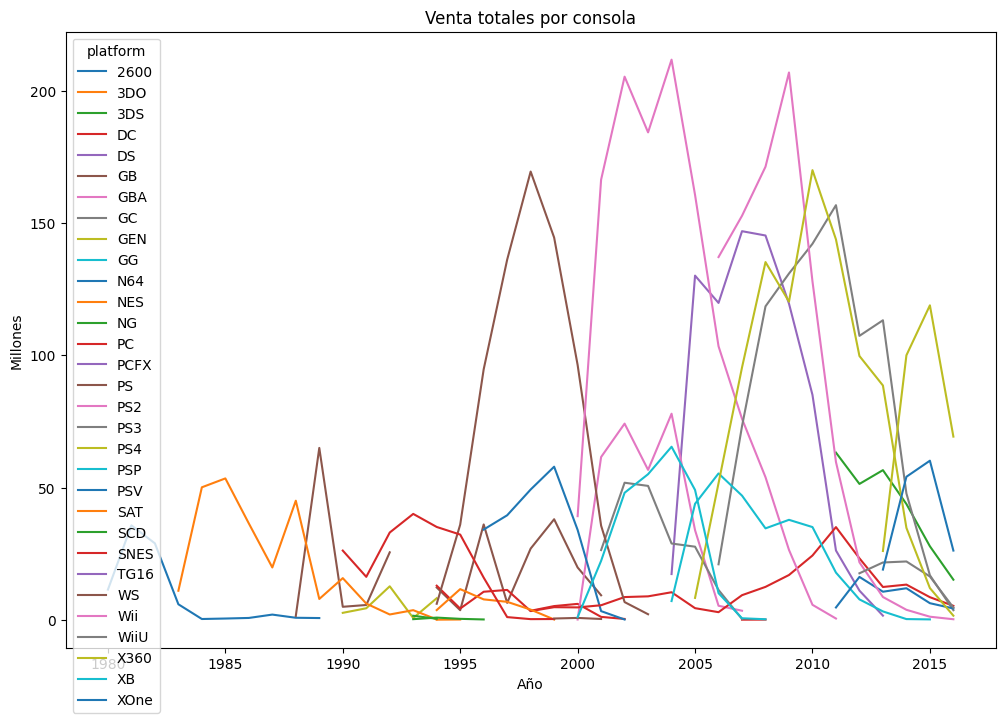

In [20]:
# Agrupamos por plataforma atraves de los años en millones de dolares.
platform_sales=df.pivot_table(index='year_of_release',columns='platform',values='total_sale', aggfunc='sum')
# Grafica 
platform_sales.plot(title='Venta totales por consola',xlabel='Año',ylabel='Millones',figsize=(12,8))
plt.show()

In [21]:
# Agrupamos por consola y ventas totales.
platform=df.pivot_table(index='platform',values='total_sale',aggfunc='sum').sort_values(by='total_sale',ascending=False)
print(platform)

,total_sale
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [23]:
# Construimos una lista con las 10 plataformas con más ventas.
popular=platform.index[0:10].tolist()
print(more_popular)

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']


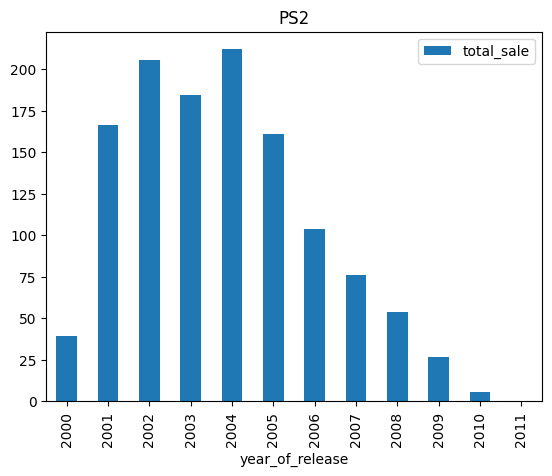

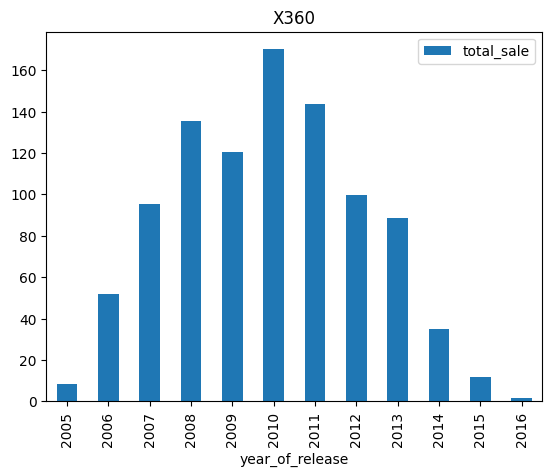

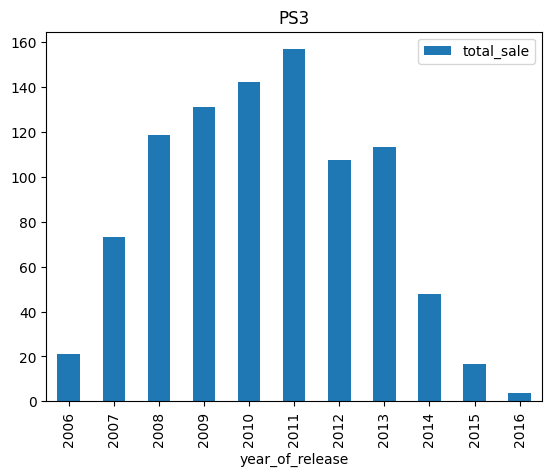

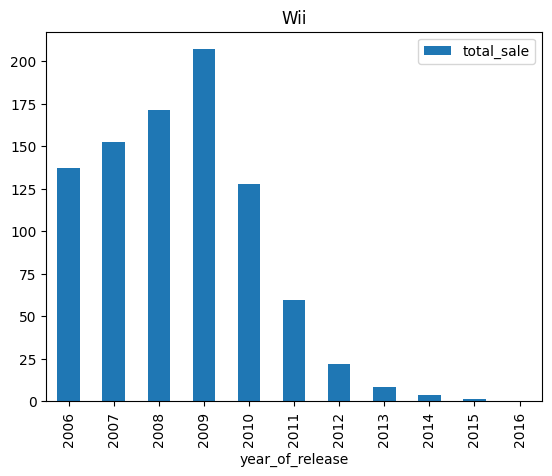

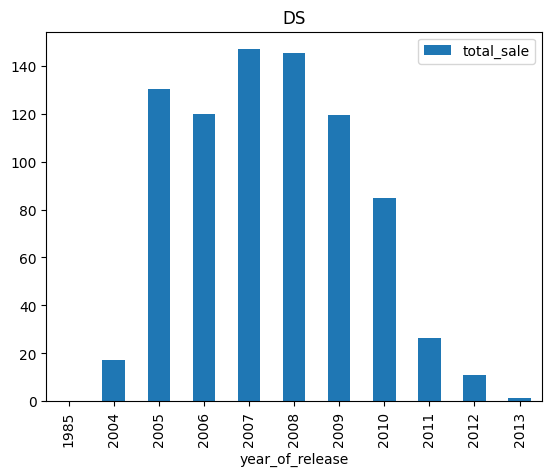

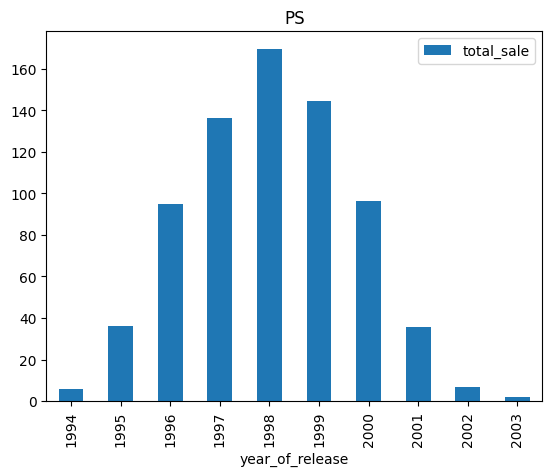

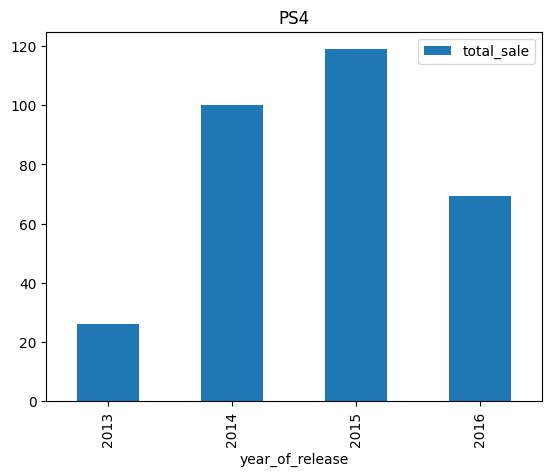

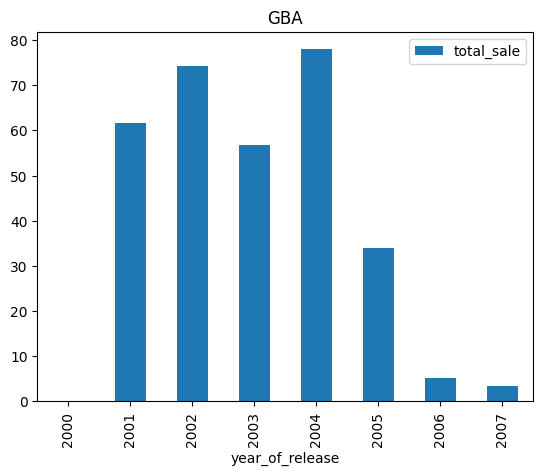

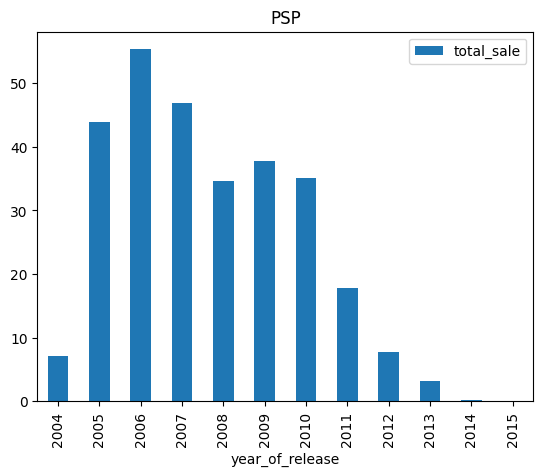

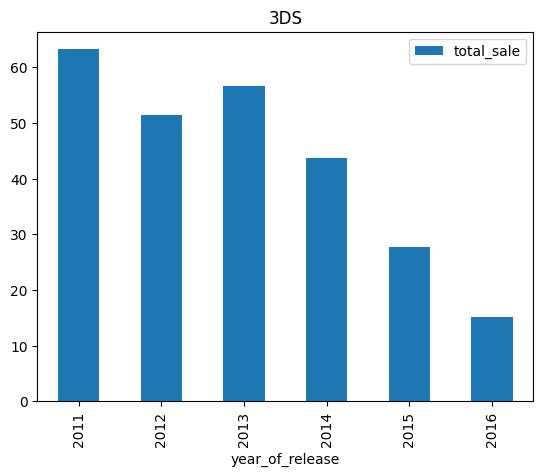

In [24]:
# Graficamos las ventas totales por año de las plataformas más populares.
for platform in popular:
    df[df['platform']==platform].pivot_table(index='year_of_release',values='total_sale',aggfunc='sum').plot(kind='bar',title=platform)

En base a las gráficas anteriores con las ventas de las plataformas más populares, podemos observar que las ventas se mantienen altas entre 5 y 6 años, antes de comenzar a descender, esto se podria traducir a los años en los que por lo regular las plataformas se mantienen en tendencia o el pico de su máxima popularidad, y empiezan a aparecer las plataformas que sustituyen a las salientes.

# Período para el modelo 2017.
Observando los graficos anteriores de ventas y numero de lanzamientos, podemos decir que el periordo que nos ofrecerá los datos viables para construir el modelo para el año 2017, es partir del 2011 hasta 2016.

In [26]:
# Filtramos los juegos lanzados en el 2011 en adelante
df_new=df[df['year_of_release']>=2011].reset_index(drop=True)
print(df_new)

                                name platform  year_of_release         genre  \
0                 Grand Theft Auto V      PS3             2013        Action   
1                 Grand Theft Auto V     X360             2013        Action   
2     Call of Duty: Modern Warfare 3     X360             2011       Shooter   
3          Call of Duty: Black Ops 3      PS4             2015       Shooter   
4                Pokemon X/Pokemon Y      3DS             2013  Role-Playing   
...                              ...      ...              ...           ...   
4017                Strawberry Nauts      PSV             2016     Adventure   
4018                Aiyoku no Eustia      PSV             2014          Misc   
4019   Samurai Warriors: Sanada Maru      PS3             2016        Action   
4020         Haitaka no Psychedelica      PSV             2016     Adventure   
4021             Winning Post 8 2016      PSV             2016    Simulation   

      na_sales  eu_sales  jp_sales  oth

In [28]:
# Agrupamos por consola y ordenamos de mayor a menor en ventas totales.
top=df_new.pivot_table(index='platform',values='total_sale',aggfunc='sum').sort_values(by='total_sale',ascending=False)
print(top)

          total_sale
platform            
PS3           445.57
X360          380.38
PS4           314.14
3DS           257.81
XOne          159.32
PC             97.68
Wii            95.02
WiiU           82.19
PSV            53.81
DS             38.73
PSP            29.01
PS2             0.45


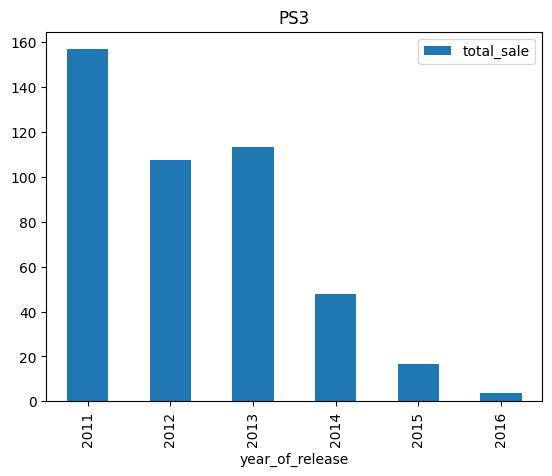

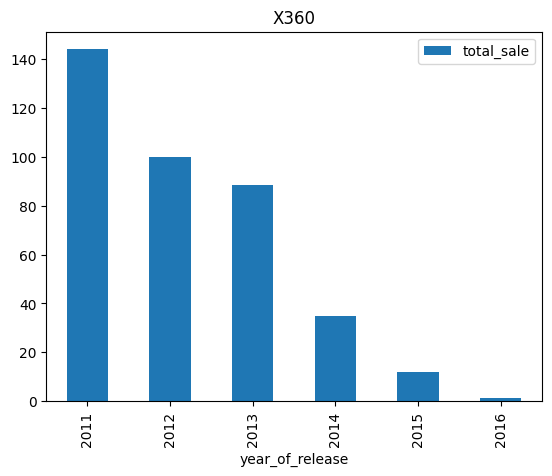

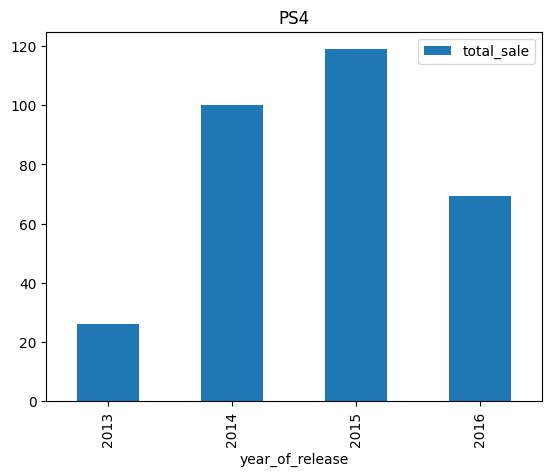

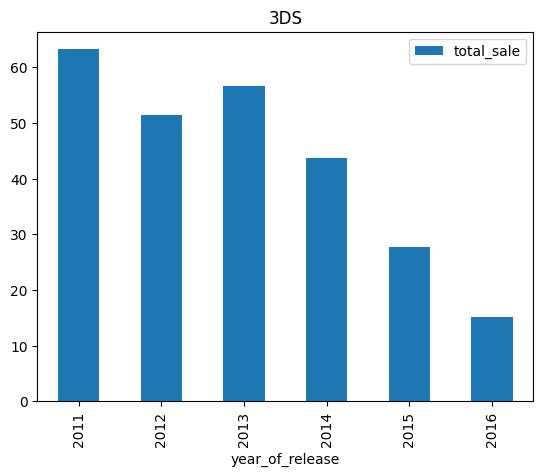

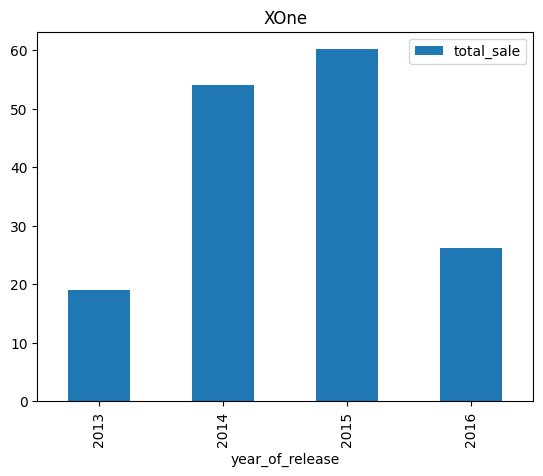

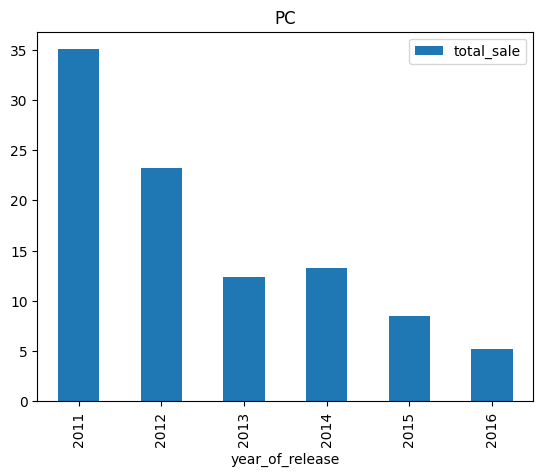

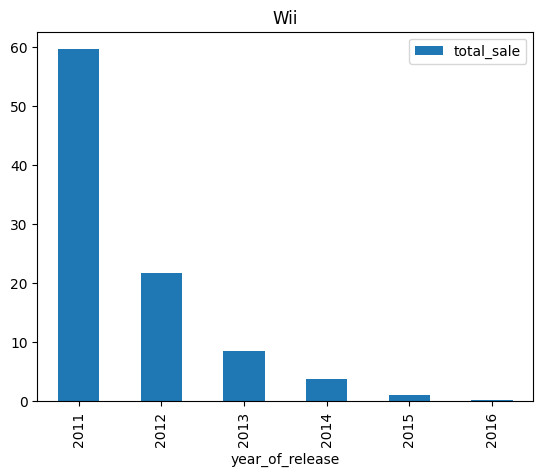

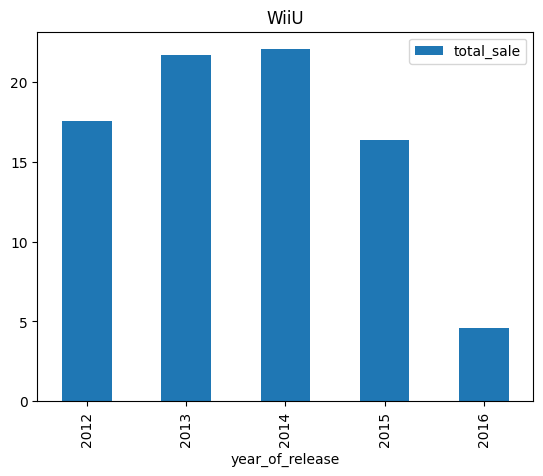

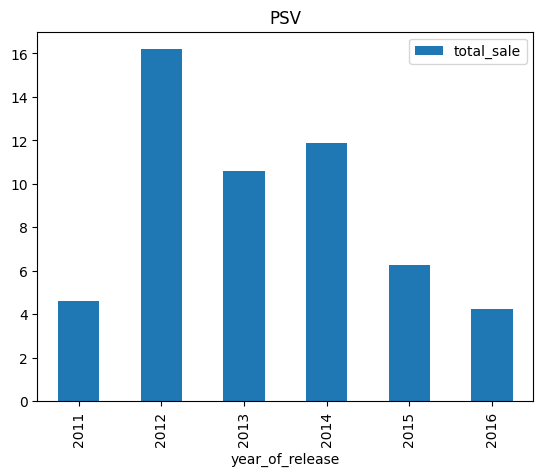

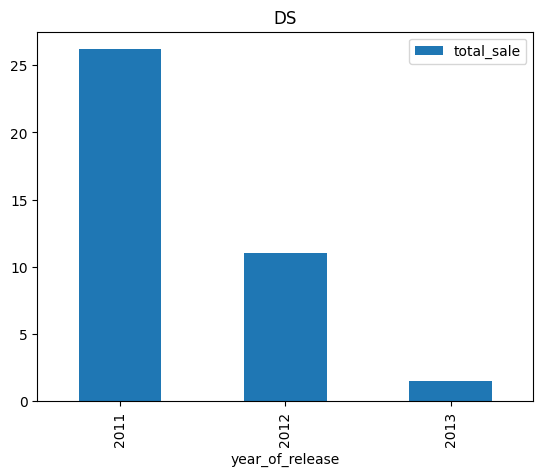

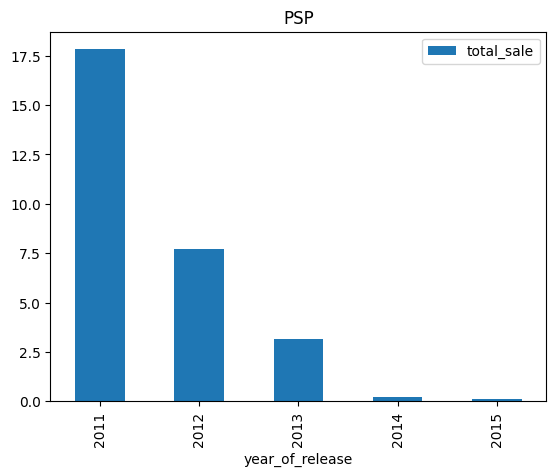

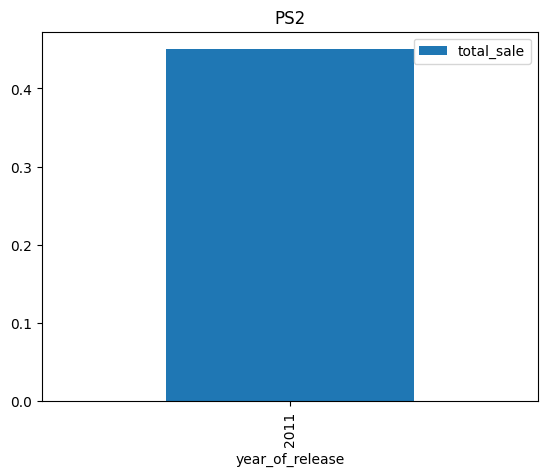

In [32]:
# Graficamos las ventas totales por año de las plataformas más populares.
for platform in top.index:
    df_new[df_new['platform']==platform].pivot_table(index='year_of_release',values='total_sale',aggfunc='sum').plot(kind='bar',title=platform)

Con los graficos anteriores podemos visualizar que casi todas tienen el pico de ventas en 2011, y de ahi desciende. Lo podemos ver en el caso de PS3, podemos observar que en el 2014 sufrio una caida en ventas esto se podria deber a que en el 2013 fue lanzado PS4, el caso es prácticamente el mismo para X360 y XOne y para Wii y WiiU, ya que son plataformas que son lanzadas para sustituir a la anterior.
En el caso de las portatíles de Nintendo DS y 3DS, el DS ya esta con sus ultimas ventas por 2013 y el 3DS se mantiene con ventas algo moderadas hasta el 2017, debido a los años que lleva vigente.
El caso es similar para PSP y PSV, la plataforma PS2 solo tiene ventas en 2011 por lo que no afecta en este analísis.
Para definir las plataformas líderes seleccionamos las que tienen las mayores ventas, en este caso serian PS3, X360, PS4,3DS, XOne, PC y Wii.
Generamos un dataframe nuevo, seleccionando solamente las plataformas líderes.

# Ventas totales por consola

In [33]:
# Filtramos las consolas lideres 
top_platform = ['PS3','X360','PS4','3DS','XOne','PC','Wii']
platform_leader = df_new[df_new['platform'].isin(top_platform)]
print(platform_leader)

                                   name platform  year_of_release  \
0                    Grand Theft Auto V      PS3             2013   
1                    Grand Theft Auto V     X360             2013   
2        Call of Duty: Modern Warfare 3     X360             2011   
3             Call of Duty: Black Ops 3      PS4             2015   
4                   Pokemon X/Pokemon Y      3DS             2013   
...                                 ...      ...              ...   
4012       Dynasty Warriors: Eiketsuden      PS3             2016   
4013  Metal Gear Solid V: Ground Zeroes       PC             2014   
4014                             Breach       PC             2011   
4016            STORM: Frontline Nation       PC             2011   
4019      Samurai Warriors: Sanada Maru      PS3             2016   

             genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
0           Action      7.02      9.09      0.98         3.96          97.0   
1           A

Text(0.5, 1.0, 'Ventas totales por consola en millones')

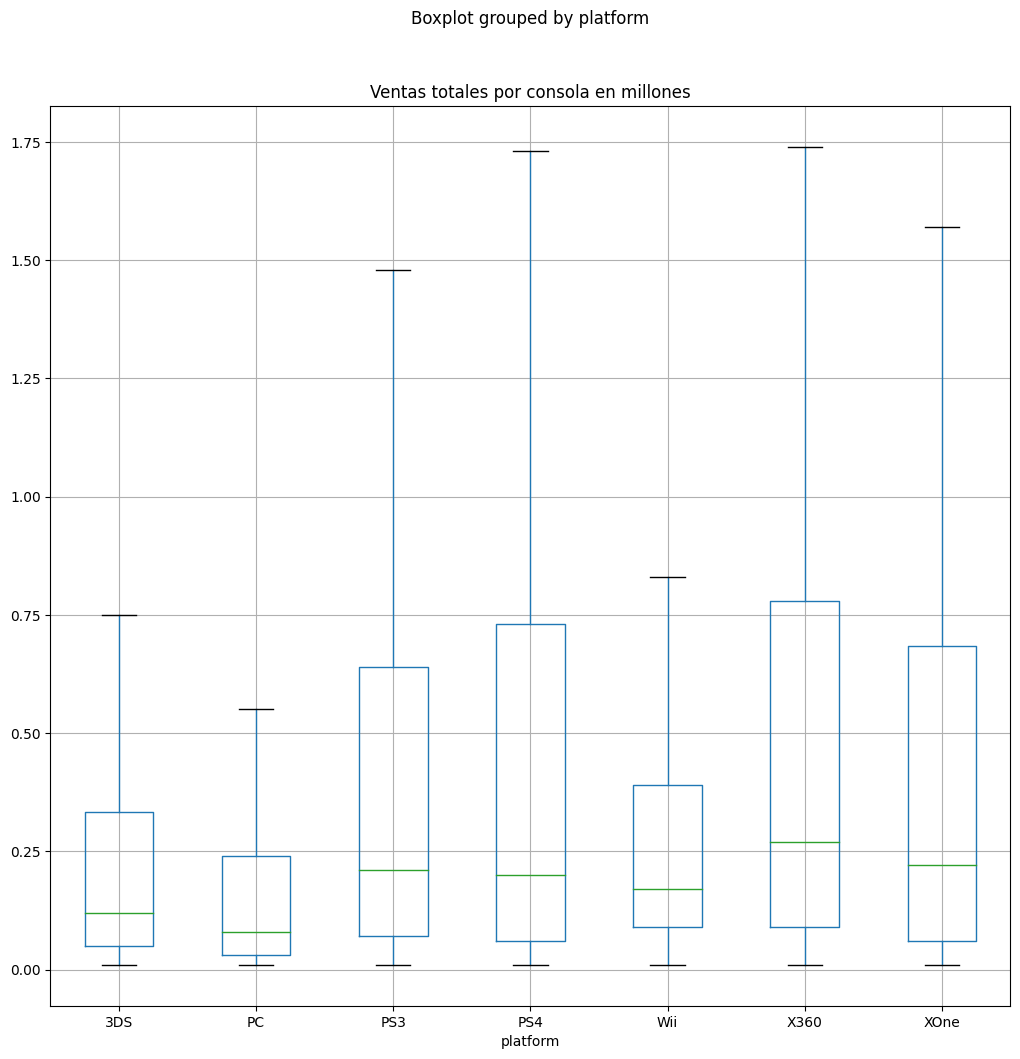

In [42]:
# Creamos diagrama de caja por consola y quitando valores atipicos
platform_leader.boxplot(by='platform',column='total_sale',figsize=(12,12),showfliers=False)
plt.title('Ventas totales por consola en millones')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, los boxplots son correctos y al colocarlos en el mismo eje es más fácil comparar las distribuciones entre las distintas plataformas.
</div>

# Relacion entre ventas y reseñas

<AxesSubplot:xlabel='user_score', ylabel='total_sale'>

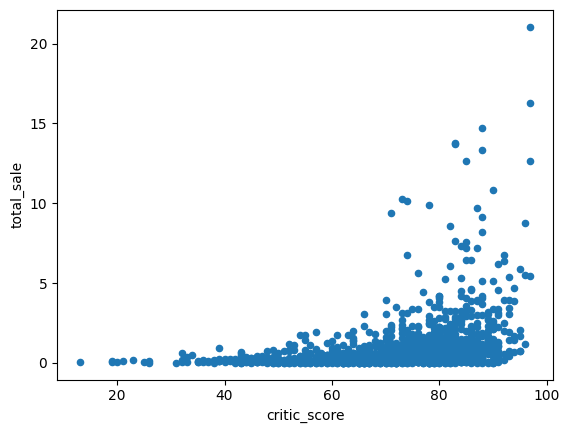

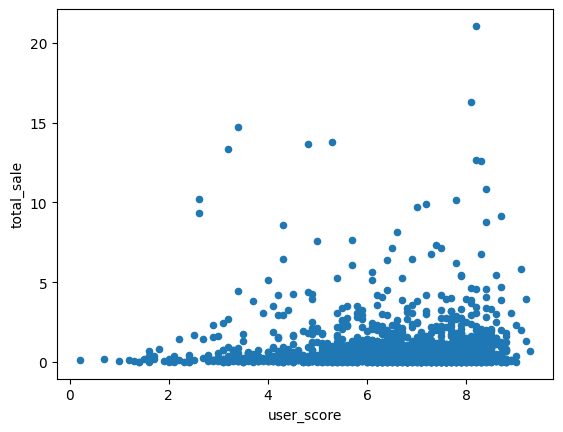

In [52]:
# Creamos graficos de dispersion
platform_leader.plot.scatter(x='critic_score',y='total_sale')
platform_leader.plot.scatter(x='user_score',y='total_sale')     

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buenas gráficas ayudan a comprender mejor la relación entre las variables. Como consejo puedes incluir un parámetro de transparencia en los scatterplot para poder visualizar mejor en que lugares se acumulan más puntos.
</div>

In [57]:
#Calculamos el coeficiente de correlacion
critic_total = platform_leader['critic_score'].corr(platform_leader['total_sale'])
print("El coeficiente de correlacion de critic_score vs total_sale:", critic_total)
user_total = platform_leader['user_score'].corr(platform_leader['total_sale'])
print("El coeficiente de correlacion de user_score vs total_sale:", user_total)

El coeficiente de correlacion de critic_score vs total_sale: 0.3383612228998773
El coeficiente de correlacion de user_score vs total_sale: 0.031948226264107635


Con los resultados anteriores podemos decir que las ventas no estan muy relacionadas con las reseñias

# Ventas por juego 

In [63]:
# Agrupamos por nombre del juego y lo ordenamos 
top_game=platform_leader.pivot_table(index='name',values='total_sale',aggfunc='sum').sort_values(by='total_sale',ascending=False)

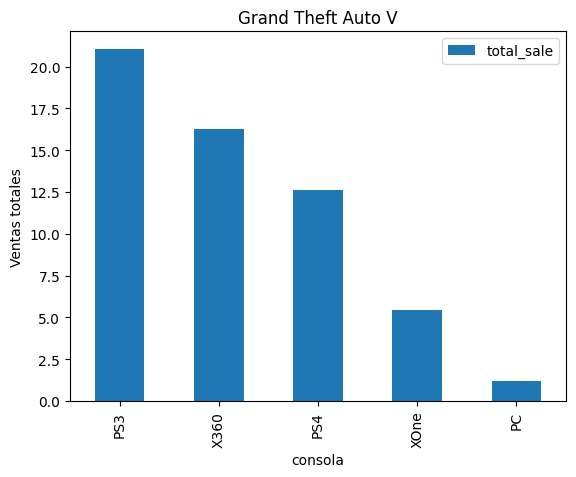

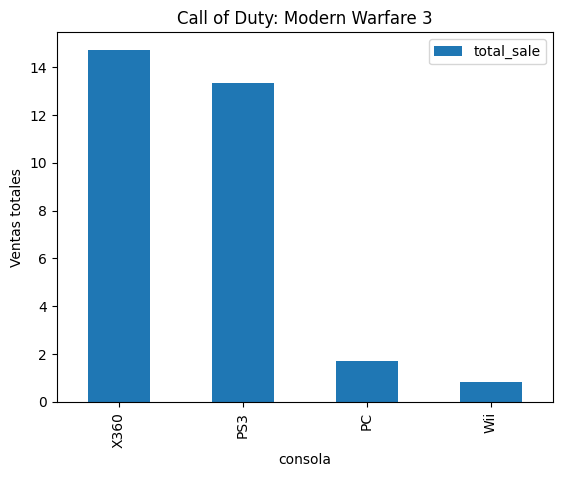

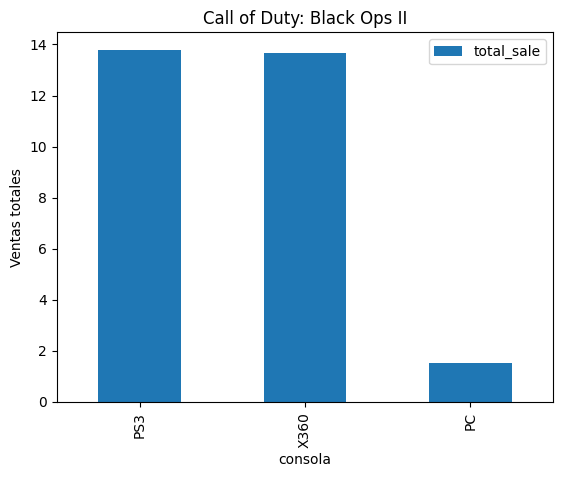

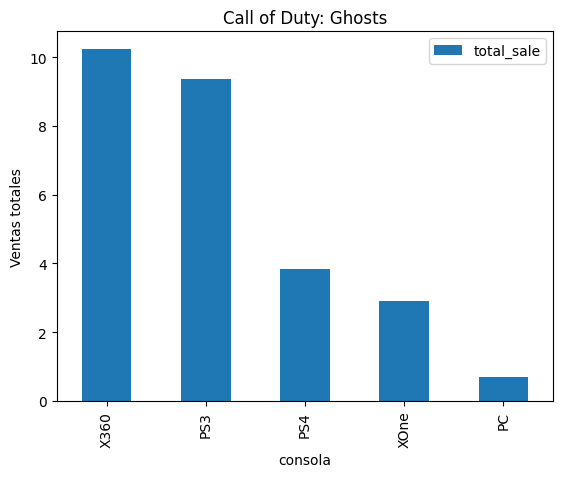

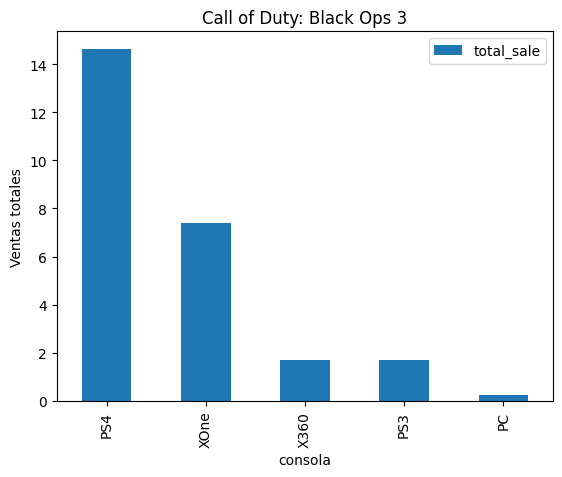

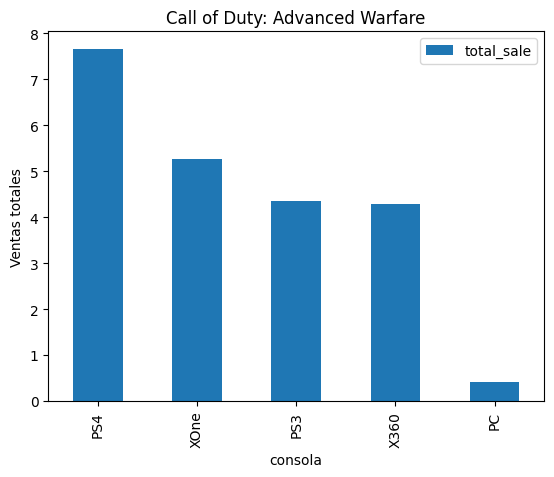

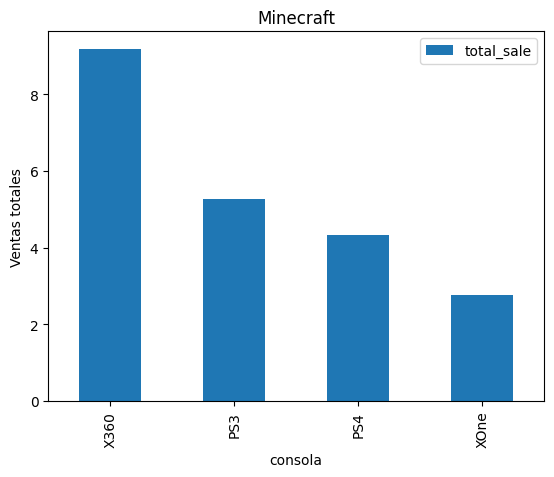

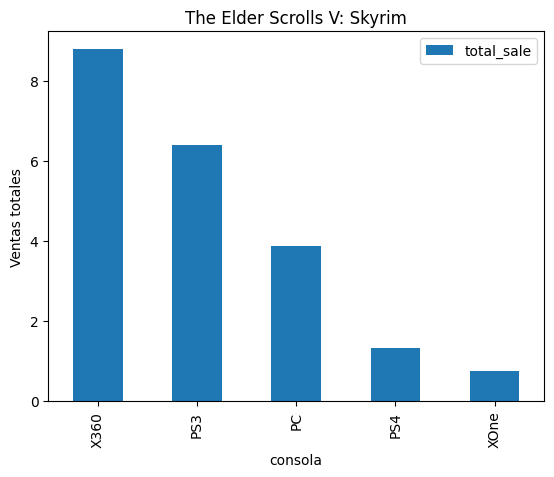

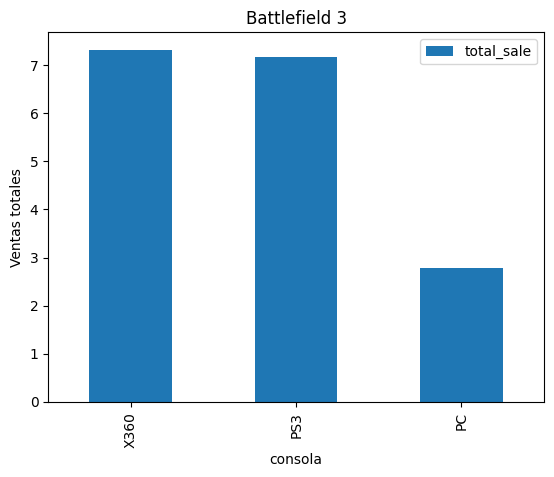

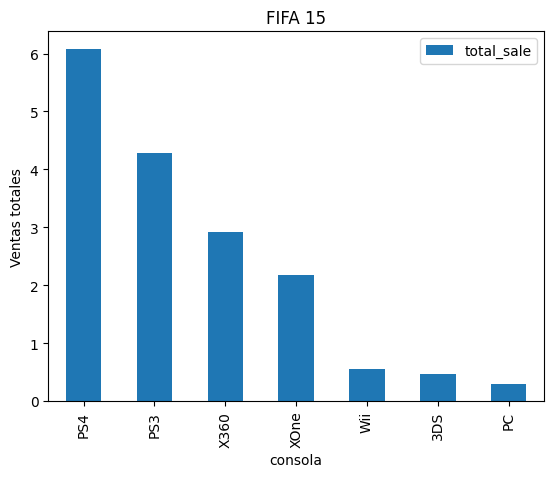

In [64]:
# Creamos una lista con los juegos mas vendidos
top_10_game = top_game.index[0:10].tolist()
# Creamos las graficas por juego 
for game in top_10_game:
    platform_leader[platform_leader['name']==game].plot(kind='bar',x='platform',y='total_sale',title=game,xlabel='consola',ylabel='Ventas totales')

Podemos observar que las plataformas mas populares son PS3, X360 y PS3, por lo que seria importante centrar la atención en estas plataformas.

# Ventas por genero 

In [66]:
# Agrupamos por nombre del juego y lo ordenamos 
top_genre=platform_leader.pivot_table(index='genre',values='total_sale',aggfunc='sum').sort_values(by='total_sale',ascending=False)
top_genre

,total_sale
genre,
Action,506.75
Shooter,392.71
Sports,225.34
Role-Playing,211.78
Misc,113.27
Racing,76.32
Platform,62.36
Fighting,55.31
Simulation,47.77


<AxesSubplot:title={'center':'Ventas por genero en millones'}, xlabel='genre'>

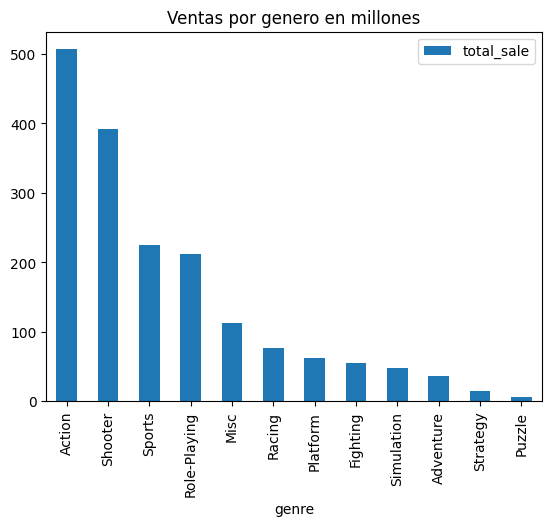

In [69]:
top_genre.plot(title='Ventas por genero en millones', kind='bar')

Los géneros mas populares son los de acción, que coincide con el juego de Grand Theft Auto V que vimos en secciones anteriores que es el que tiene mas ventas, seguido por el Shooter, categoría donde entran los juegos de Call of Duty que también estan entre los mas vendidos.
A los generos anteriores les siguen los géneros de Sports y Role_Playing, donde caen los juegos de Fifa y juegos como Fallout 4, que fueron muy populares cuando fueron lanzados.
En el caso de los juegos con mas ventas, tenemos los de Strategy y Puzzle, en el caso de los primeros son juegos que son populares pricipalmente en PC y que tienen lanzamientos mas espaciados entre los años, y para Puzzle suele ser mas popular en móviles.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen análisis, la grpafica de barras está ordenada de mayor a menor y eso facilita su comparación.
</div>

# Perfiles de usuarios por región.
En esta sección para cada región (NA, UE y JP) se determinará lo siguiente:
Las 5 plataformas más populares.
Los 5 géneros principales.
¿Las clasificaciones ESRB afectan a las ventas de las regiones individuales?

# Consolas más vendidas

In [71]:
#Agrupamos las ventas de na por plataforma
platform_na = df.pivot_table(index='platform',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)
print(platform_na.head(5))

          na_sales
platform          
X360        595.74
PS2         572.92
Wii         486.87
PS3         390.13
DS          380.31


In [72]:
#Agrupamos las ventas de EU por plataforma
platform_eu = df.pivot_table(index='platform',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)
print(platform_eu.head(5))

          eu_sales
platform          
PS2         332.63
PS3         327.21
X360        268.32
Wii         258.32
PS          212.39


In [73]:
#Agrupamos las ventas de JP por plataforma
platform_jp = df.pivot_table(index='platform',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)
print(platform_jp.head(5))

          jp_sales
platform          
DS          175.02
PS          139.78
PS2         137.54
SNES        116.55
3DS         100.62


Podemos observar que existe gran diferencia en las consolas en base a las regiones, esto es debido a que desde su lanzamiento Xbox 360 ha dominado las ventas en Norte América, Europa se mantiene como lider Playstation tanto el PS2 como el PS3 y para la región de Japón la familia de nintendos.
Cabe destacar que el PS2 esta en el top 3 de todas las regiones

# Juegos más vendidos por genero

In [74]:
genre_na = df.pivot_table(index='genre',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)
print(genre_na.head(5))

          na_sales
genre             
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57


In [77]:
genre_eu = df.pivot_table(index='genre',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)
print(genre_eu.head(5))

         eu_sales
genre            
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60


In [78]:
genre_jp = df.pivot_table(index='genre',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)
print(genre_jp.head(5))

              jp_sales
genre                 
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02


Para los géneros, podemos observar que tanto en Norte América como Europa son mas populares Action, Shooter y Sports, mientras que para Japón son Role-Playing, Action y Sport, esto es debido a que en Japón los juegos de Role-Playing son de los mas jugados, al grado de generar gran afluencia de personas en los lanzamientos.

# Pruebas de hipótesis.

Se verificarán las siguientes 2 hipótesis.

Las calificaciones promedio de usuarios PS2 y PS3 son las mismas.
Las calificaiones promedio de usuarios los generos Action y Sports son diferentes.

Las calificaciones promedio de los usuarios de PS2 y PS3 son las mismas.
H0:Las calificaciones promedio de los usuarios de PS2 y PS3 son iguales.(PS2=PS3)
Ha: Las calificaciones promedio de los usuarios de PS2 y PS3 no son iguales.(PS2!=PS3)
El valor alpha a utilizar será de 0.05.

In [79]:
# Extraemos los datos necesarios
ps2 = df[df['platform']=='PS2']['user_score']
ps3 = df[df['platform']=='PS3']['user_score']
# Eliminamos valores ausentes
ps2=ps2.dropna().reset_index(drop=True)
ps3=ps3.dropna().reset_index(drop=True)

In [80]:
#Se utiliza la prueba T
alpha = 0.05
results = st.ttest_ind(ps2, ps3,equal_var=True)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")
     

p-value:  3.326216083163738e-47
Rechazamos la hipótesis nula


Las calificaciones promedio de los usuarios de Action y Sports son diferentes.
H0:Las calificaciones promedio de los usuarios de los géneros Action y Sports son iguales.(Action = Sports)
Ha: Las calificaciones promedio de los usuarios de los géneros Action y Sports difieren.(Action != Sports)

El valor alpha a utilizar será de 0.05.

In [81]:
# Extraemos los datos necesarios
action = df[df['genre']=='Action']['user_score']
sports = df[df['genre']=='Sports']['user_score']
# Eliminamos valores ausentes
action = action.dropna().reset_index(drop=True)
sports = sports.dropna().reset_index(drop=True)

In [82]:
#Se utiliza la prueba T
alpha = 0.05
results = st.ttest_ind(action, sports,equal_var=True)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value:  0.06480928064420527
No rechazamos la hipótesis nula


# Conclusión General.
En la tabla con la información se encontró una gran cantidad de valores ausentes en las reseñas, tanto en la de la crítica especializada como en la de los usuarios, dada la naturaleza de estos datos no fue recomendable rellenarlos con alguna medida estadística y se dejaron tal cual, esto fue con el objeto de llegar a conlusiones o recomendaciones no adecuadas.
De igual manera encontramos un promedio de "vida útil" de las consolas, que esta entre 6 y 7 años, esto fue con la finalidad de encontrar tendencias y poder obtener la información que nos pueda indicar los patrones que se puedan utilizar para planificar la campaña 2017.
Para lo anterior se utilizaron los datos a partir del 2011 y las plataformas mas populares, que fueron PS3, X360, PS4, 3DS, XOne y PC.
Dadas las tendencias de compra en cada región es necesario que se tenga una campaña diferente según la region objetivo.
Norte América, enfocarse en la consola Xbox y en los géneros de Action, Shooter y Sports.
Europa, enfocarse en la consola PlayStation y en los géneros Action, Shooter y Sports.
Japón, enfocarse en Nintendo y PlayStation y el género mas popular es el de Role_Playing, seguido por Action y Sports.
En base a que los generos mas populares son Action, Shooter y Sports, y que los promedios de las calificaciones de los usuarios de Action y Sports son muy cercanas, se sugiere hacer promociones que permitan que estos géneros sean adquiridos juntos.